In [1]:
# problem: Build image classification model using CNN on fashion MNIST dataset.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# read 
train_data=pd.read_csv('/Users/poorvadityabehre/Desktop/College/DL_FINAL/fashion-mnist_train.csv')
test_data=pd.read_csv('/Users/poorvadityabehre/Desktop/College/DL_FINAL/fashion-mnist_test.csv')

In [3]:
train_data.shape

(60000, 785)

In [4]:
test_data.shape

(10000, 785)

In [5]:
# split into train and test 
X_train, y_train = train_data.drop('label', axis=1), train_data['label']
X_test, y_test = test_data.drop('label', axis=1), test_data['label']

In [13]:
# modify to numpy array 
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

print("X_train : {0}".format(X_train))
print("X_test : {0}".format(X_test))
print("y_train : {0}".format(y_train))
print("y_test : {0}".format(y_test))

X_train : [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.       

In [8]:
# normalize 
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
# reshape 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [11]:
# make categorically
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("y_train : {0}".format(y_train))
print("y_test : {0}".format(y_test))

y_train : [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
y_test : [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=None)

print("X_train : {0}".format(X_train))
print("X_test : {0}".format(X_test))
print("y_train : {0}".format(y_train))
print("y_test : {0}".format(y_test))

X_train : [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.       

In [20]:
# cnn model --> 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
600/600 [==============================] - 6s 10ms/step - loss: 0.6220 - accuracy: 0.7710 - val_loss: 0.4841 - val_accuracy: 0.8191
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.3914 - accuracy: 0.8601 - val_loss: 0.3715 - val_accuracy: 0.8631
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.3318 - accuracy: 0.8795 - val_loss: 0.3128 - val_accuracy: 0.8856
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2976 - accuracy: 0.8913 - val_loss: 0.3186 - val_accuracy: 0.8839
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2728 - accuracy: 0.8993 - val_loss: 0.2987 - val_accuracy: 0.8898
Epoch 6/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2473 - accuracy: 0.9099 - val_loss: 0.2757 - val_accuracy: 0.9028
Epoch 7/10
600/600 [==============================] - 6s 9ms/step - loss: 0.2287 - accuracy: 0.9158 - val_loss: 0.2705 - val_accuracy: 0.9048
Epoch

In [23]:
# evaluate model using testing data 
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.9105
Test accuracy: 0.9104999899864197


In [24]:
# make prediction using testing data and store its value in prediction 
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
# labels present in fashion MNIST dataset
class_label_map = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

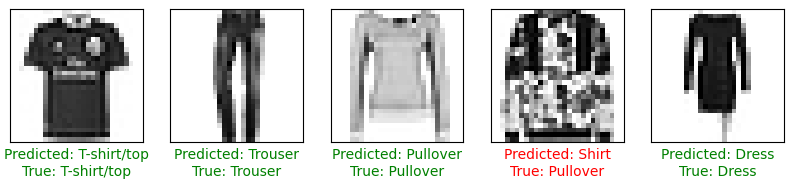

In [27]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    # get predicted label 
    predicted_label = np.argmax(predictions[i])
    # get its true label 
    true_label = np.argmax(y_test[i])
    
    predicted_text = class_label_map[predicted_label]
    true_text = class_label_map[true_label]
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_text}\nTrue: {true_text}', color=color)
plt.show()